In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset =  pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x = dataset.iloc[:, [3,4]].values

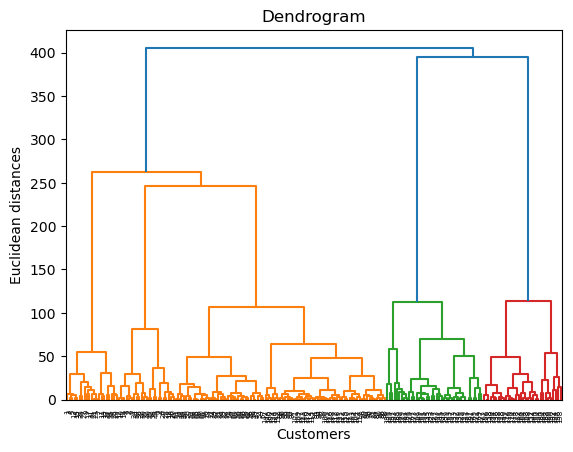

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [6]:
from sklearn.cluster import  AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

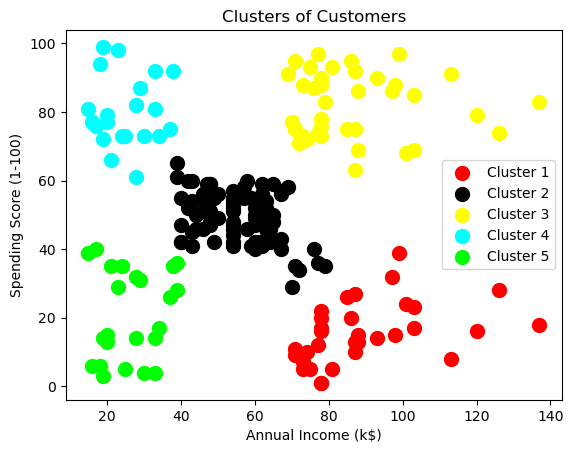

In [7]:
plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s=100, c='black', label='Cluster 2')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_hc == 4,0], x[y_hc == 4,1], s=100, c='lime', label='Cluster 5')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()